In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [39]:
CSV_PATH = "/workspace/plane-nerf/outputs/jackal_tag_training_data_1/plane-nerf/2024-03-20_215238/eval_results_2024-03-26_181345.csv"

In [40]:
#Open CSV file as 2d numpy array
csv_data = np.genfromtxt(CSV_PATH, delimiter=',')
#If nan values are present, replace them with 0
csv_data = np.nan_to_num(csv_data)
iteration = csv_data[:, 0::3]
translation = csv_data[:, 1::3]
rotation = csv_data[:, 2::3]


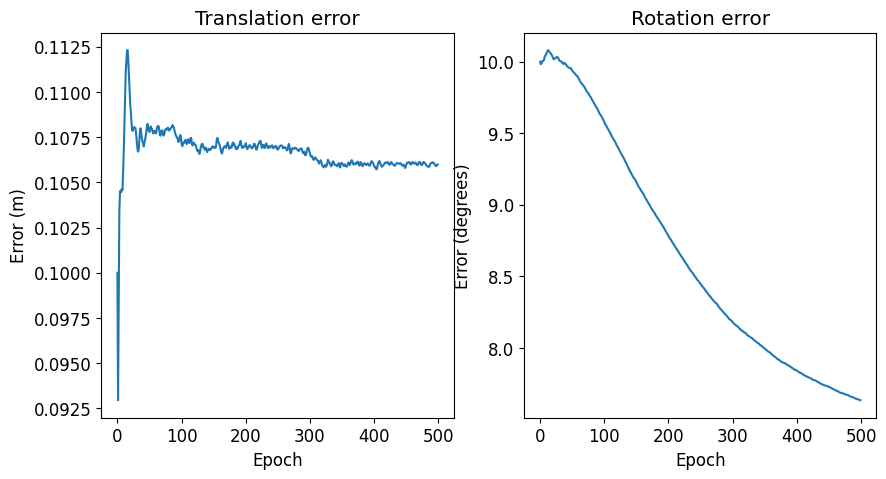

In [41]:
#Plot mean of translation and rotation error separately

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(translation.mean(axis=0))
plt.title("Translation error")
plt.xlabel("Epoch")
plt.ylabel("Error (m)")

plt.subplot(1, 2, 2)
plt.plot(rotation.mean(axis=0) * 180 / math.pi)
plt.title("Rotation error")
plt.xlabel("Epoch")
plt.ylabel("Error (degrees)")

plt.show()

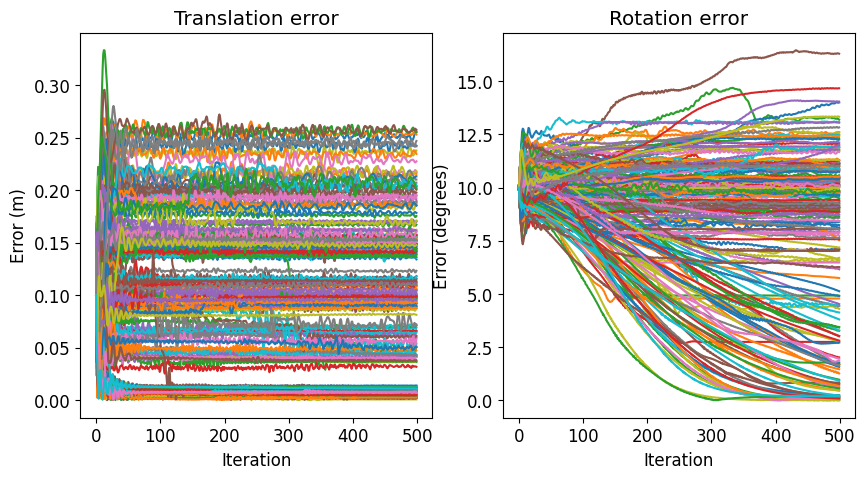

In [42]:
#Plot mean of translation and rotation error of a specific arrays of rows
row = [i for i in range(len(csv_data))]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(translation[row].T)
plt.title("Translation error")
plt.xlabel("Iteration")
plt.ylabel("Error (m)")

plt.subplot(1, 2, 2)
plt.plot(rotation[row].T * 180 / math.pi)
plt.title("Rotation error")
plt.xlabel("Iteration")
plt.ylabel("Error (degrees)")

plt.show()

Final translation error: 0.10599249546300399 m
Final rotation error: 7.634537097373027 degrees
Standard deviation of final translation error: 0.0713405306476886 m
Standard deviation of final rotation error: 4.152835472811779 degrees
[0.275 0.2   0.215 0.2   0.09  0.02  0.   ] [0.   0.05 0.1  0.15 0.2  0.25 0.3 ]
[0.29  0.33  0.375 0.005 0.    0.    0.   ] [ 0  5 10 15 20 25 30]


(0.0, 1.0)

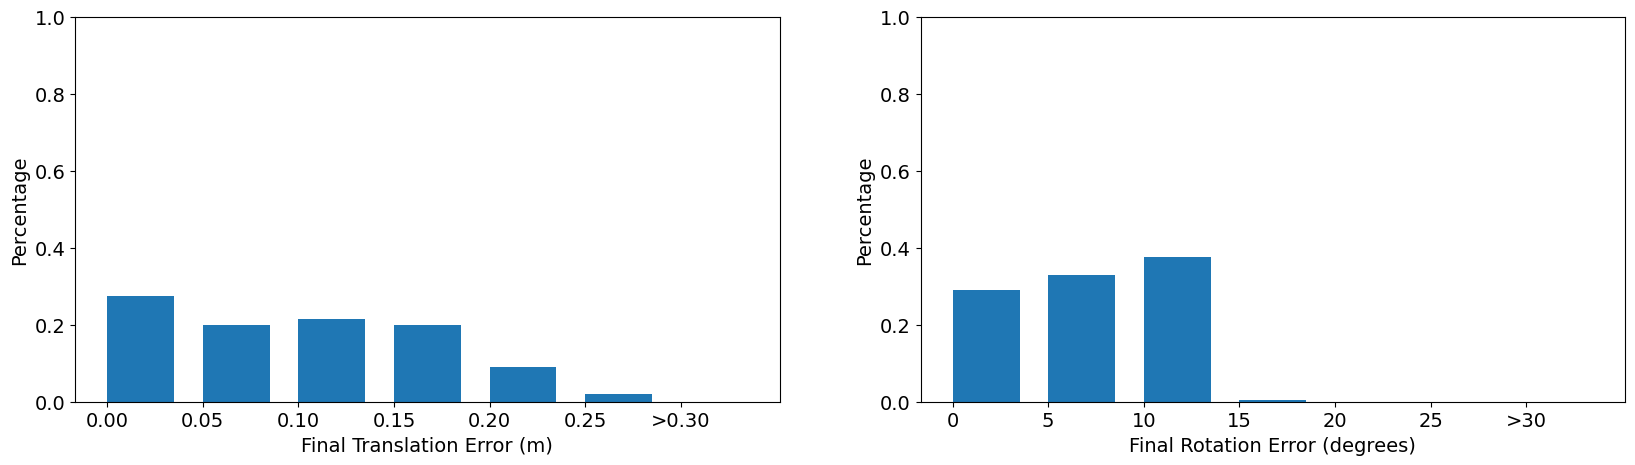

In [43]:
final_translation_error = translation[:,-1]
final_rotation_error = rotation[:,-1]
print(f"Final translation error: {final_translation_error.mean()} m")
print(f"Final rotation error: {final_rotation_error.mean() * 180 / math.pi} degrees")

#Find standard deviation of final translation and rotation error
print(f"Standard deviation of final translation error: {final_translation_error.std()} m")
print(f"Standard deviation of final rotation error: {final_rotation_error.std() * 180 / math.pi} degrees")

#Plot 3 graphs for PSNR, SSIM, LPIPS side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

#Increase font size
plt.rcParams.update({'font.size': 12})

#Increase font size of axis
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

#Plot histogram of final translation and rotation error

bin = []
percentage = []
cnt = 6
for x in range(cnt):
    i = x * 0.05
    bin.append(i)
    percentage.append(len(final_translation_error[(final_translation_error >= i) & (final_translation_error < i+0.05)])/200)

bin.append(0.3)
percentage.append(len(final_translation_error[(final_translation_error >= 0.3)])/200)

bin = np.array(bin)
percentage = np.array(percentage)

x_axis_labels = ["0.00", "0.05", "0.10", "0.15", "0.20", "0.25", ">0.30"]

print(percentage,bin)

bar_width = np.array([0.05] * (cnt+1)) * 0.7

axs[0].bar(bin, percentage, width=bar_width, align="edge", tick_label=x_axis_labels)
axs[0].set_xlabel("Final Translation Error (m)")
axs[0].set_ylabel("Percentage")
axs[0].set_ylim(0, 1)

bin = []
percentage = []
cnt = 6
for x in range(cnt):
    i = x * 5
    bin.append(i)
    percentage.append(len(final_rotation_error[(final_rotation_error/math.pi *180 >= i) & (final_rotation_error/math.pi*180 < i+5)])/200)

bin.append(30)
percentage.append(len(final_rotation_error[(final_rotation_error/math.pi *180 >= 30)])/200)

bin = np.array(bin)
percentage = np.array(percentage)

x_axis_labels = ["0", "5", "10", "15", "20", "25", ">30"]

print(percentage,bin)

bar_width = np.array([5] * (cnt+1)) * 0.7

axs[1].bar(bin, percentage, width=bar_width, align="edge", tick_label=x_axis_labels)
axs[1].set_xlabel("Final Rotation Error (degrees)")
axs[1].set_ylabel("Percentage")
axs[1].set_ylim(0, 1)


(0.0, 500.0)

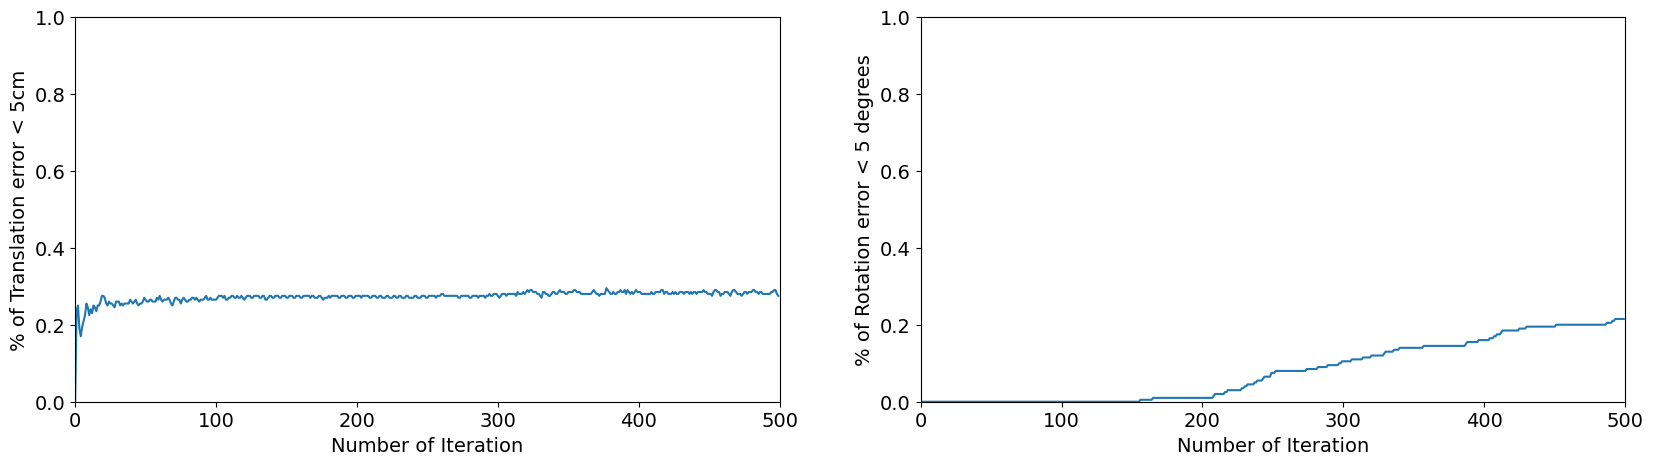

In [44]:
#Plot 3 graphs for PSNR, SSIM, LPIPS side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

#Increase font size
plt.rcParams.update({'font.size': 12})

#Increase font size of axis
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

#Draw ratio that falls below 5 cm 5 degrees against iteration
axs[0].plot((translation < 0.05).mean(axis=0))
axs[0].set_ylabel("% of Translation error < 5cm")
axs[0].set_xlabel("Number of Iteration")
axs[0].set_ylim(0, 1)
axs[0].set_xlim(0,500)

axs[1].plot(((rotation < 0.05).mean(axis=0)))
axs[1].set_ylabel("% of Rotation error < 5 degrees")
axs[1].set_xlabel("Number of Iteration")
axs[1].set_ylim(0, 1)
axs[1].set_xlim(0,500)

In [45]:
#Find index of the worst performing model
worst_translation_index = np.argmax(final_translation_error)
worst_rotation_index = np.argmax(final_rotation_error)

print(f"Worst performing model for translation error: {worst_translation_index}")
print(f"Worst performing model for rotation error: {worst_rotation_index}")

Worst performing model for translation error: 185
Worst performing model for rotation error: 15
